In [7]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [8]:
import os
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.colors as colors

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

In [9]:
figure_dir = os.path.join(repo_path, 'figures')
array_dir = os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'pixel_density_test')

In [10]:
pandeia_1 = np.load(os.path.join(array_dir, 'detector_1.npy'))
pandeia_3 = np.load(os.path.join(array_dir, 'detector_3.npy'))
pandeia_5 = np.load(os.path.join(array_dir, 'detector_5.npy'))
pandeia_7 = np.load(os.path.join(array_dir, 'detector_7.npy'))
pandeia_9 = np.load(os.path.join(array_dir, 'detector_9.npy'))

In [11]:
def get_norm(array):
    abs_min, abs_max = abs(np.min(array)), abs(np.max(array))
    limit = np.max([abs_min, abs_max])
    linear_width = np.abs(np.mean(array) + (3 * np.std(array)))
    return colors.AsinhNorm(linear_width=linear_width, vmin=-limit, vmax=limit)

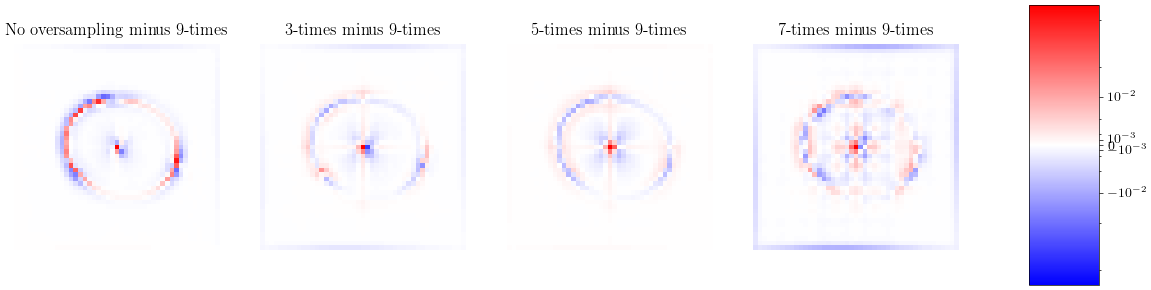

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(14,4))

ax0 = ax[0].imshow(pandeia_1 - pandeia_9, cmap='bwr', norm=get_norm(pandeia_1 - pandeia_9))
ax1 = ax[1].imshow(pandeia_3 - pandeia_9, cmap='bwr', norm=get_norm(pandeia_3 - pandeia_9))
ax2 = ax[2].imshow(pandeia_5 - pandeia_9, cmap='bwr', norm=get_norm(pandeia_5 - pandeia_9))
ax3 = ax[3].imshow(pandeia_7 - pandeia_9, cmap='bwr', norm=get_norm(pandeia_7 - pandeia_9))

# TODO fix! the colorbar is only accurate for the first plot - all others are incorrect since they're being scaled according to their own data and the colorbar is set to be correct for only the first plot

ax[0].set_title('No oversampling minus 9-times')
ax[1].set_title('3-times minus 9-times')
ax[2].set_title('5-times minus 9-times')
ax[3].set_title('7-times minus 9-times')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax0, cax=cbar_ax)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
ax[3].set_axis_off()

plt.savefig(os.path.join(figure_dir, 'oversampling.png'))
plt.show()